## **Autoencoders**

* How to detect anomalies
* How to use the latent (bottleneck) variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/BreastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
## variable of interest is diagnosis
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [3]:
## unsupervised is harder because it does NOT learn from the diagnosis
## can we use only the predictors (scan) to detect anomalies

In [4]:
## Preprocessing
X = df.drop(['id', 'diagnosis'], axis=1)

In [8]:
X.drop('Unnamed: 32', axis=1, inplace=True)

In [5]:
## diagnosis df
diagnosis_df = df[['id', 'diagnosis']]

In [7]:
## PCA (plot two PCs) is an option

In [ ]:
## fit an autoencoder
## X and we want to recreate \tilde(X)
## compute the reconstruction error of every scan (patient)
## observations with high reconstruction error awre candidates for anomalies

In [9]:
## the number of features on each scan (mammograms)
X.shape ## 30 feau

(569, 30)

In [10]:
## Autoencoder
## Input 30 - 20 - 10 - 4 - 10 - 20 - 30 Output
## Work best if X variables are standardize to 0 - 1

In [12]:
## 1) minmax scaler to transform X to be scaled from 0 to 1
from sklearn.preprocessing import MinMaxScaler

## instance
scaler = MinMaxScaler()

## fit transform
X_scaled = scaler.fit_transform(X)

## dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
## not going to split into training and test
## goal: get anomalies

In [15]:
## architecture
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## Input Layer
input = Input(shape=(30, ))
## Encoder Layers
encoder1 = Dense(20, activation = "relu")(input)
encoder2 = Dense(10, activation = "relu")(encoder1)
## BottleNeck
latent = Dense(4, activation = "relu")(encoder2)
## Decoder Layers
decoder1 = Dense(10, activation = "relu")(latent)
decoder2 = Dense(20, activation = "relu")(decoder1)
## Output Layer
output = Dense(30, activation = "sigmoid")(decoder2)

## Combined Model
AE = Model(input, output)

In [16]:
## summary
AE.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              44 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             630 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,774 (6.93 KB)

 Trainable params: 1,774 (6.93 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
## compile
AE.compile(optimizer='adam', loss='mse') ## autoencoders (X, \tilder(X))

In [18]:
history = AE.fit(X_scaled, X_scaled,
       epochs = 100,
       batch_size = 10,
       validation_split = 0.2)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0894 - val_loss: 0.0661
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0526 - val_loss: 0.0315
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0302 - val_loss: 0.0225
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - val_loss: 0.0172
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - val_loss: 0.0149
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - val_loss: 0.0141
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - val_loss: 0.0125
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - val_loss: 0.0108
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

<Axes: >

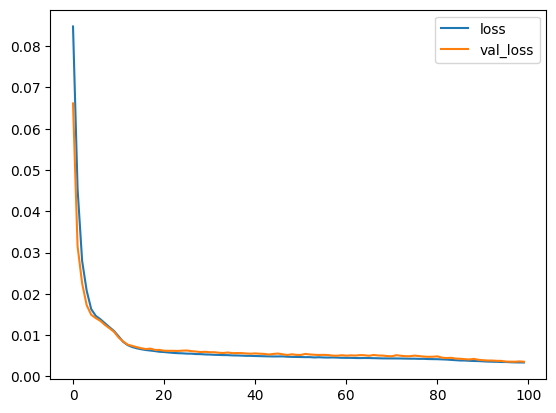

In [19]:
## plot the learning rate
pd.DataFrame(history.history).plot()

In [22]:
## reconstructed mamograms
X_reconstructed = pd.DataFrame(AE.predict(X_scaled), columns=X.columns)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [23]:
## can detect anomalies by computing the reconstruction error
## needs to be reconstruction per obs np.mean((X-tX)**2, axis = 1)
reconstruction_error = np.mean(np.power(X_scaled - X_reconstructed, 2), axis=1)

In [24]:
reconstruction_error

,0
0,0.011151
1,0.002178
2,0.001792
3,0.012792
4,0.004036
...,...
564,0.005391
565,0.003695
566,0.004285
567,0.003941


In [26]:
diagnosis_df['reconstruction_error'] = reconstruction_error
diagnosis_df.head()

<ipython-input-26-7ff8e35f71a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['reconstruction_error'] = reconstruction_error


,id,diagnosis,reconstruction_error
0,842302,M,0.011151
1,842517,M,0.002178
2,84300903,M,0.001792
3,84348301,M,0.012792
4,84358402,M,0.004036


In [27]:
## sort descending on reconstruction error
diagnosis_df.sort_values('reconstruction_error', ascending=False, inplace=True)

<ipython-input-27-f2bb3fec5e54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df.sort_values('reconstruction_error', ascending=False, inplace=True)


In [29]:
diagnosis_df.head(50) ### top 50 reconstruction errors

,id,diagnosis,reconstruction_error
213,881094802,M,0.027352
461,911296202,M,0.026250
152,8710441,B,0.018698
146,869691,M,0.017897
68,859471,B,0.017576
190,874858,M,0.017448
119,865128,M,0.016548
505,915276,B,0.015459
12,846226,M,0.015396
42,855625,M,0.015075


In [30]:
## bottom 50 reconstructions
diagnosis_df.tail(50)

,id,diagnosis,reconstruction_error
406,905189,B,0.000811
241,883539,B,0.000808
148,86973702,B,0.000803
189,874839,B,0.000800
149,869931,B,0.000791
98,862485,B,0.000787
211,8810528,B,0.000776
50,857343,B,0.000751
497,914580,B,0.000747
546,922577,B,0.000746


<Axes: ylabel='Frequency'>

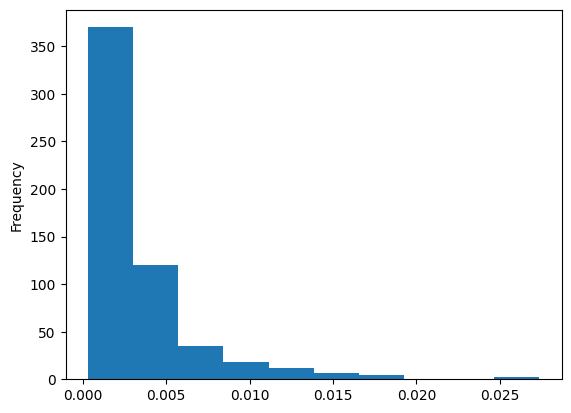

In [31]:
## get of histogram of the reconstruction errors
## see if there are anomalies that stand out
diagnosis_df['reconstruction_error'].plot(kind='hist')

In [32]:
## let's say the top 100 (completely subjective) observations are anomalies
df_100 = diagnosis_df.head(100)

In [33]:
df_100['diagnosis'].value_counts()

,count
diagnosis,
M,54
B,46


In [ ]:
## detection rate 54/100 = 54% of malignant tumors
## if encoded as 0 and 1 (top_100['diagnosis'].sum() / 100)

## Autoencoder to detect anomalies

* They are useful in very imbalanced problem (fraud detection, ...)
* Depend a lot on architecture (determining the latent space 4 is crucial)
* We condensed 30 variables to 4 and hoped to extract information from the 4

In [34]:
## How to use the latent space of autoencoders as a smaller data set
## 30 - 20 -10 - 4 (latent space)

## architecture
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## Input Layer
input = Input(shape=(30, ))
## Encoder Layers
encoder1 = Dense(20, activation = "relu")(input)
encoder2 = Dense(10, activation = "relu")(encoder1)
## BottleNeck
latent = Dense(4, activation = "relu")(encoder2)
## Decoder Layers
decoder1 = Dense(10, activation = "relu")(latent)
decoder2 = Dense(20, activation = "relu")(decoder1)
## Output Layer
output = Dense(30, activation = "sigmoid")(decoder2)

## Combined Model
AE = Model(input, output)
encoder_model = Model(input, latent)  ## allows us to get the output of latent

In [35]:
## compile only the AUTOENCODER
AE.compile(optimizer='adam', loss='mse')

In [36]:
## fit only the AUTOENCODER
history = AE.fit(X_scaled, X_scaled,
       epochs = 200,
       batch_size = 10,
       validation_split = 0.2)

Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0909 - val_loss: 0.0661
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - val_loss: 0.0323
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0328 - val_loss: 0.0258
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - val_loss: 0.0229
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - val_loss: 0.0196
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0196 - val_loss: 0.0161
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - val_loss: 0.0147
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - val_loss: 0.0142
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 0.0138
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 0.0134
Epoch 11/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - val_loss: 0.0132
Epoch 12/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

In [37]:
## We are interested in the latent space (4 variables)
## we assume the 4 variable contain information about 30 variables
## We can use only 4 varibles as predictors in a model.
X_latent = encoder_model.predict(X_scaled)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [39]:
X_latent = pd.DataFrame(X_latent, columns = ['latent1', 'latent2', 'latent3', 'latent4'])

In [40]:
## now if I need a supervised model, I can use X_latent and y
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_latent, diagnosis_df['diagnosis'], test_size=0.2, random_state=42)

## fit
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

## predict
y_pred = rf.predict(X_test)

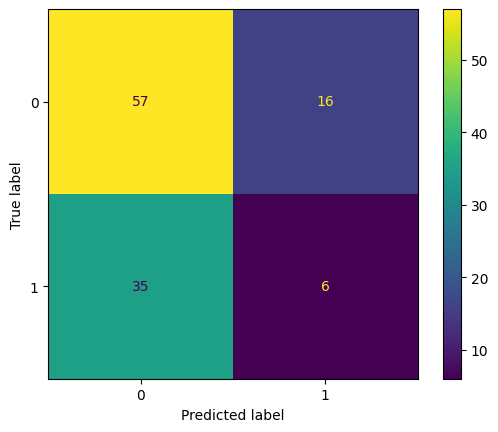

In [41]:
## confusionmatrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()